<a href="https://colab.research.google.com/github/ericyen28/RDP-Reading-Data-with-Python-and-Pandas/blob/master/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Outlier Detection

*Due: Friday, 2 December, 2022 at 17:00 CET*

For the first assignment of the course Applications of Machine Learning (INFOB3APML), you will learn to use decision tree, random forest, and isolation forest to detect an outlier class. The objectives of this assignment are:
- use the supervised classification algorithms to classify outliers in real-life data sets
- perform cross validation and fine-tune the model parameters of each algorithm
- use the unsupervised outlier detection algorithms to detect outliers in real-life data sets
- calculate model performance (e.g., accuracy, recall, precision, f1)
- design experiments to compare performance of algorithms
- reflect on the difference between different models


This assignment includes three algorithms: DT, RF, and IF. The first task is to perform data exploration. In Task 2-4, you will use the three algorithms to classify outliers, respectively. In Task 5, you will compare the algorithms and evaluate their results. Please note that Task 2-4 have the following structure:
1. First, find the library (e.g., sklearn examples) and try out the algorithm by simply training the model on the training data (do not consider any parameters or cross validation just yet); 
2. Train the model with the training data by using cross validation and find the best parameter setting for the parameters of interest;
3. Report the average test accuracy, recall, precision, and F1 scores of all validation sets;
4. Finally, test the optimal model that has the best fitting parameters on your held-out test data, and report its accuracy, precision, recall, and F1. 

Note that, in Task 5, you will need all the calculated accuracy, precision, recall and F1 measures from previous tasks. Make sure you save these to a list or dictionary so you can easily evaluate and compare the results. 




## Task 1: Exploring the data set
 
 

### Data set: Bank Marketing


Import the file *dataBank-additional-full_normalised.csv* to load the preprocessed data set. "*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*"


Use the column "label" as the response variable. The instances labeled with 1 are the "outliers", in this case the class we would like to detect accurately; the instance labeled with 0 are the inliers. 


The original data description can be found via the link here below. You will also find some explanations regarding the features under the section "Attribute Information".  
https://archive.ics.uci.edu/ml/datasets/bank+marketing





In [ ]:
# Import packages
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

# Import data
data = pd.read_csv('./dataBank-additional-full_normalised.csv', sep=',')
data.head(5)
data.describe()
print(data.describe)

<bound method NDFrame.describe of             age  job=housemaid  job=services  job=admin.  job=blue-collar  \
0      0.209877              0             0           0                0   
1      0.296296              0             0           1                0   
2      0.246914              1             0           0                0   
3      0.160494              0             1           0                0   
4      0.530864              0             0           0                1   
...         ...            ...           ...         ...              ...   
41183  0.271605              0             0           0                1   
41184  0.333333              0             0           0                0   
41185  0.172840              0             0           0                0   
41186  0.148148              0             0           1                0   
41187  0.382716              0             0           0                0   

       job=technician  job=retired  job=m


### 1.1. Exploratory data analysis

For the data set, create 2-3 figures and tables that will help you understand the data. 


During the data exploration, you, as a team, are trying to get an impression about the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many instances are there in each class? Are the classes imbalanced?
- How many variables are in the data? What is the data type and the distribution of each variable? 
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)

#### Tips: 

Make sure to at least check the data type of each variable and to understand the distribution of each variable, especially the response variable. 

Try to find out what factors seem to determine whether an instance is an outlier or not. What do you conclude?

*For creating data visualizations, you may consider using the matplot library and visit the [matplot gallery](https://matplotlib.org/stable/gallery/index.html) for inspiration (e.g., histograms for distribution, or heatmaps for feature correlation).*



In [ ]:
# create an overview of the data
#print(data.describe())
print(data.columns)
count_job=data.loc[:, ["job=housemaid", "job=services", "job=admin.", "job=blue-collar", "job=technician"]].apply(lambda x: x.value_counts()).T.stack()
job_counts=pd.DataFrame(count_job, columns=["Count"]).transpose()
job_counts

#job_data=job_counts.iloc[job_counts["job=housemaid"]==1]
#job_data
#px.histogram(data_frame=job_data, x="job=housemaid", title="Distribution of jobs")

Index(['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'p

job=housemaid      job=services       job=admin.       job=blue-collar  \
                  0    1            0     1          0     1               0   
Count         11763  320        10923  1160       9057  3026            9407   

            job=technician        
          1              0     1  
Count  2676          10158  1925

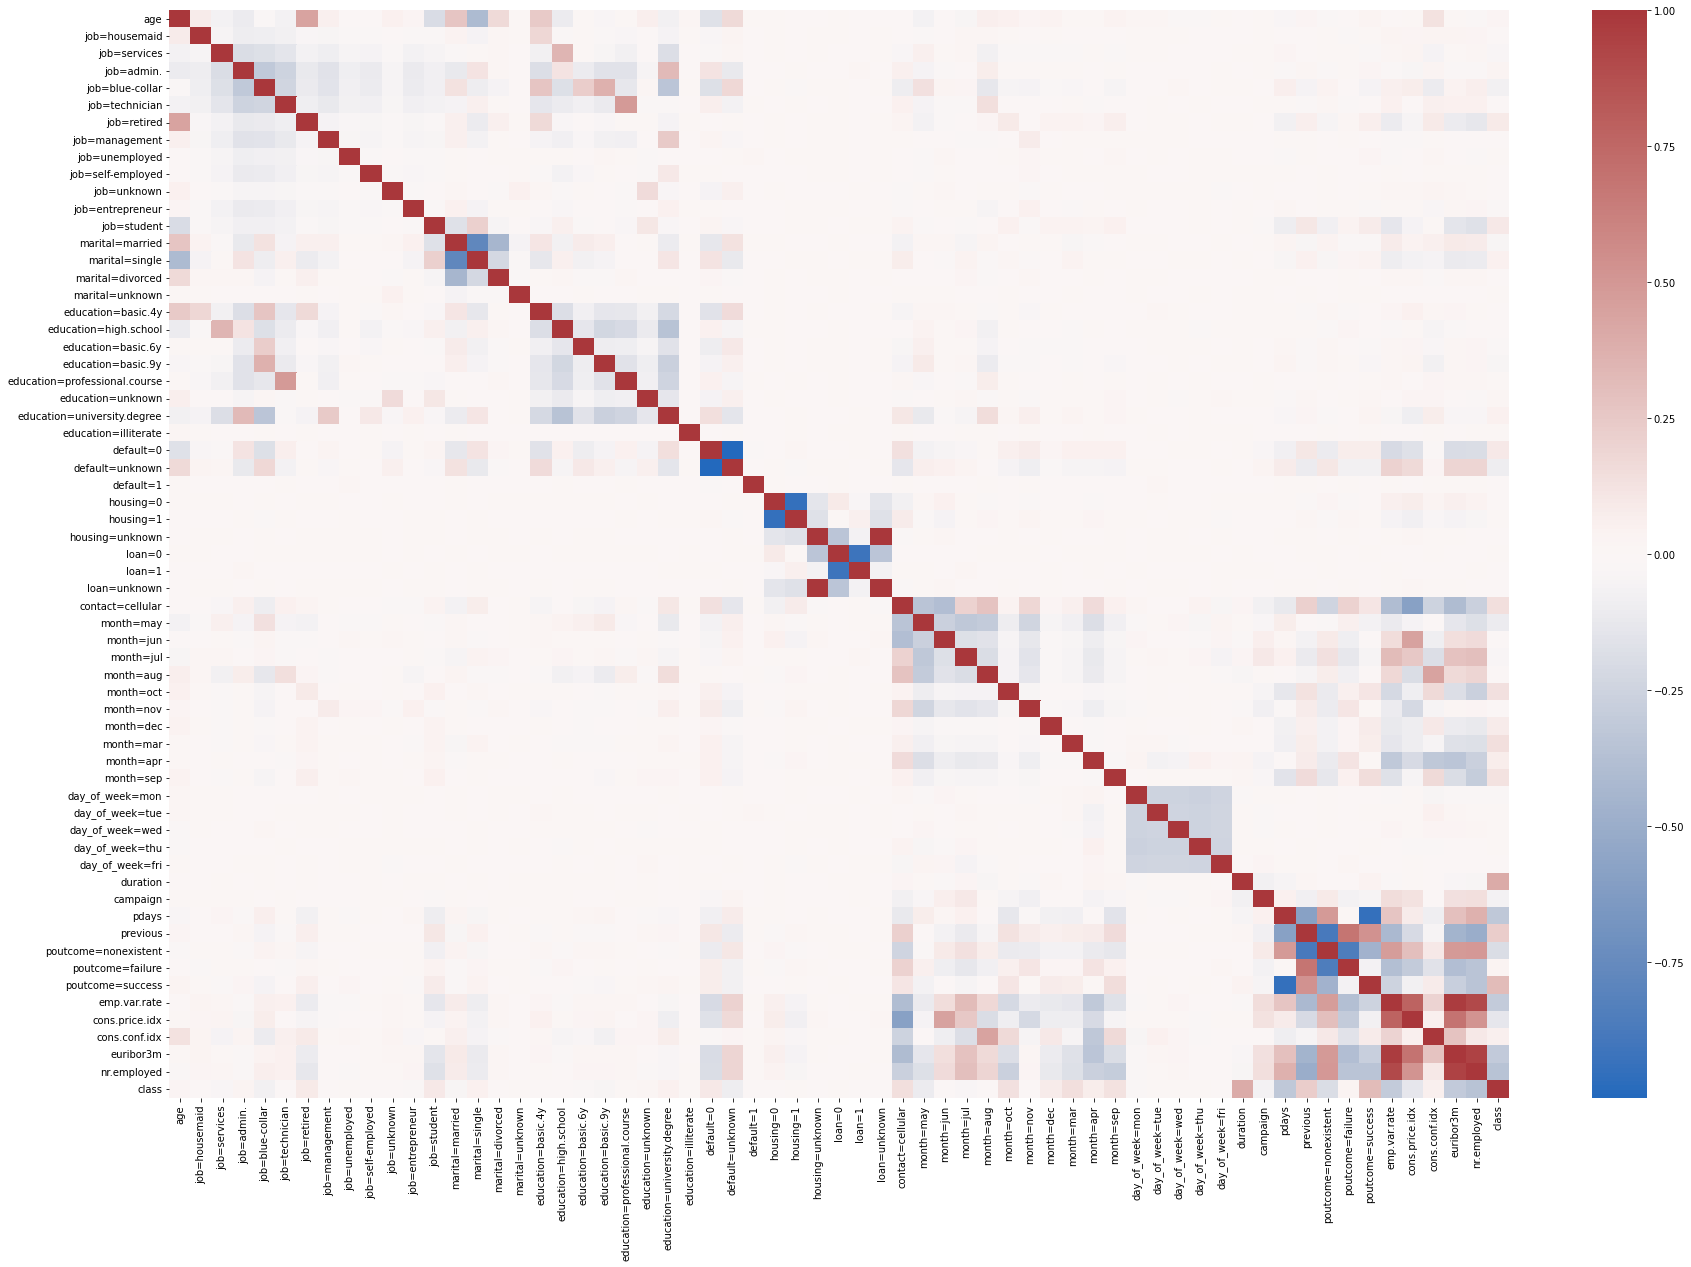

In [ ]:
"""
Heatmap correlation matrix with all 64 features
"""

corr_data = data.corr()

fig = plt.figure(figsize=(30,20))
sns.heatmap(corr_data, annot=False, center=0, cmap="vlag")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


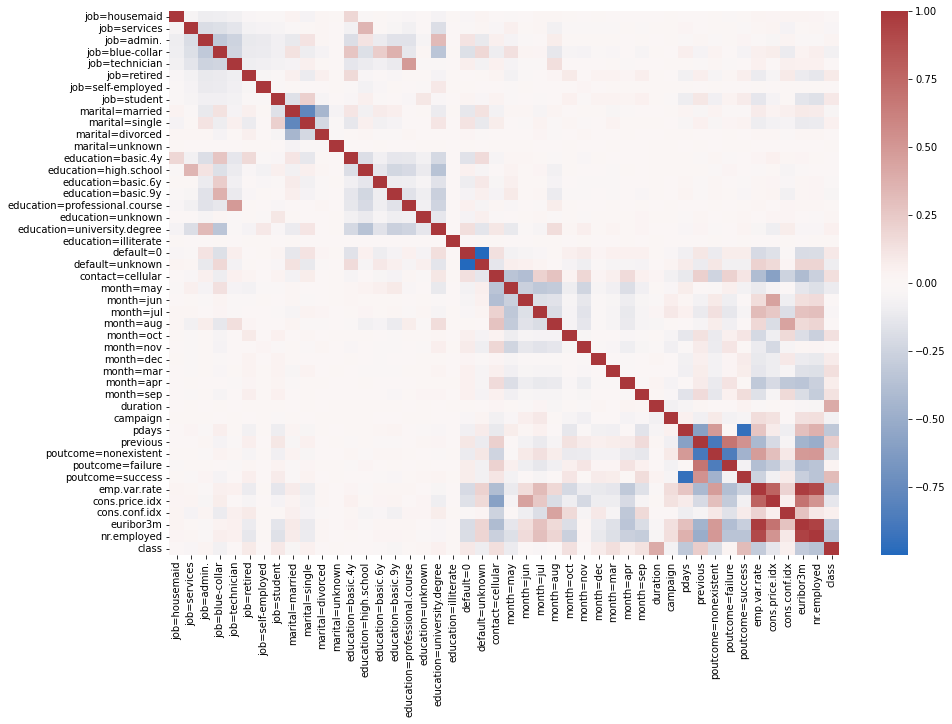

In [ ]:
"""
Heatmap correlation matrix with dropped insignificant features
"""

features = ["day_of_week=mon","day_of_week=tue", "day_of_week=wed",
                            "day_of_week=thu", "day_of_week=fri","loan=0", "loan=1",  "loan=unknown",
                            "housing=0", "housing=unknown", "housing=1", "job=management", "job=unemployed", "job=unknown", "job=entrepreneur", "default=1", "age"]
corr_data = data.corr()
corr_data = corr_data.drop(features)
corr_data = corr_data.drop(features, 1)

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_data, annot=False, center=0, cmap="vlag")
plt.show()

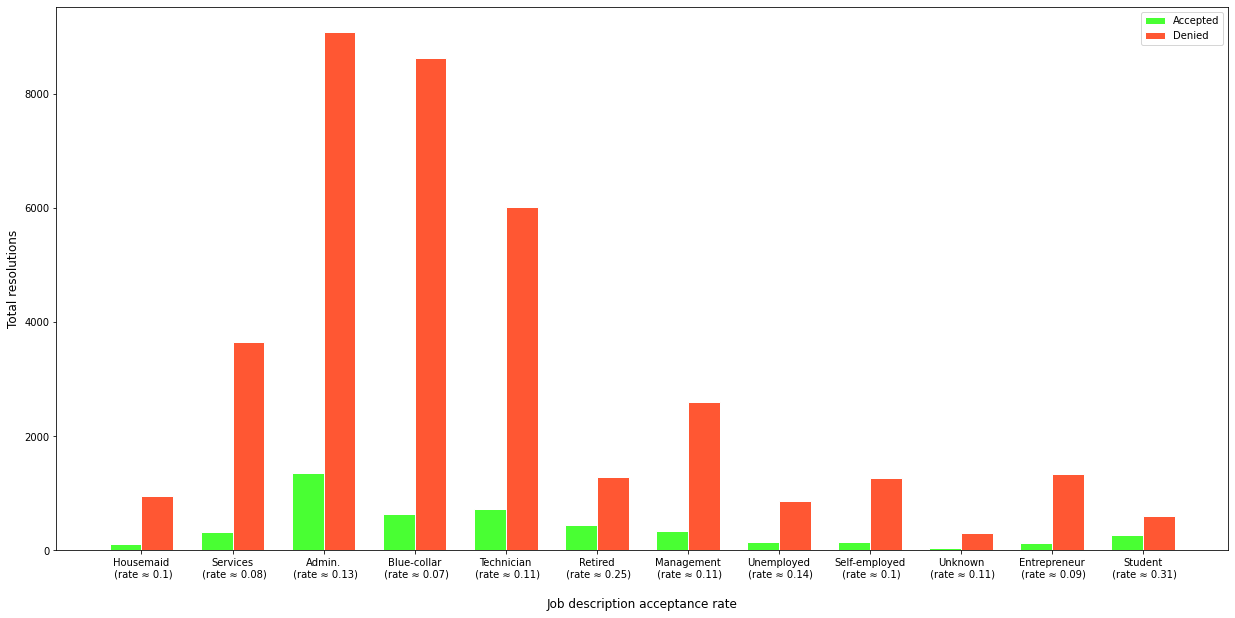

In [ ]:
# Create data
col_total = dict()
col_succs = dict()
for col in data.columns:
    if ("job=" in col):
        col_total[col] = 0
        col_succs[col] = 0
        for _, row in data.iterrows():
            if (row[col]==1):
                col_total[col] += 1
                col_succs[col] += row["class"]
bars1 = []
bars2 = []
for key in col_total.keys():
    bars1.append(col_succs[key])
    bars2.append(col_total[key] - col_succs[key])

# Create dataset
barWidth = 0.35
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create bars
plt.figure(num=1, figsize=((1.75*len(bars1)), 10))
bar1 = plt.bar(r1, bars1, color='#49FF33', width=barWidth, edgecolor='white', label='Accepted')
bar2 = plt.bar(r2, bars2, color='#FF5733', width=barWidth, edgecolor='white', label='Denied')
bars = []
for key in col_total.keys():
    colPretty = key.split("=")[1].capitalize()
    colPretty = colPretty + "\n (rate ≈ " + str(round(col_succs[key]/col_total[key],2)) + ")"
    bars.append(colPretty)

# Create labels
plt.xticks([(barWidth / 2) + r for r in range(len(bars1))], bars)
plt.xlabel("\nJob description acceptance rate", size = 12)
plt.ylabel("Total resolutions", size = 12)
#plt.bar_label(bar1) (doesn't work in older python)
#plt.bar_label(bar2) (doesn't work in older python)

# Show graphic
plt.legend()
plt.show()

In [ ]:
# Create data
col_total = dict()
col_succs = dict()
for col in data.columns:
    if ("poutcome=" in col):
        col_total[col] = 0
        col_succs[col] = 0
        for _, row in data.iterrows():
            if (row[col]==1):
                col_total[col] += 1
                col_succs[col] += row["class"]
bars1 = []
bars2 = []
for key in col_total.keys():
    bars1.append(col_succs[key])
    bars2.append(col_total[key] - col_succs[key])

# Create dataset
barWidth = 0.35
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create bars
plt.figure(num=1, figsize=((1.75*len(bars1)), 10))
bar1 = plt.bar(r1, bars1, color='#49FF33', width=barWidth, edgecolor='white', label='Accepted')
bar2 = plt.bar(r2, bars2, color='#FF5733', width=barWidth, edgecolor='white', label='Denied')
bars = []
for key in col_total.keys():
    colPretty = key.split("=")[1].capitalize()
    colPretty = colPretty + "\n (rate ≈ " + str(round(col_succs[key]/col_total[key],2)) + ")"
    bars.append(colPretty)

# Create labels
plt.xticks([(barWidth / 2) + r for r in range(len(bars1))], bars)
plt.xlabel("\nPrevious campaign outcome rate", size = 12)
plt.ylabel("Total resolutions", size = 12)
#plt.bar_label(bar1) (doesn't work in older python)
#plt.bar_label(bar2) (doesn't work in older python)

# Show graphic
plt.legend()
plt.show()

NameError: ignored

### 1.2. Creating Train and Test data sets

Create a training and a held-out test data set. *Later in Task 2-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data and motivate your choice when you discuss the experiment setup in your report. 

Tips: 

*You may use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) class provided by sklearn*

In [ ]:
# copy data
df = data.copy()

# create X and y
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
X = df[features]
y = df[['class']]



# create training data and held-out test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Task 2: Decision Trees

### 2.1 Training a Decision Tree

Use the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn to learn a decision tree model by fitting the full training data.

Show/plot the tree diagram and also plot the feature importances. 
What do you observe?


#### Tips:

To show the tree diagram, you may use the graphviz library or use the plot_tree function, see https://scikit-learn.org/stable/modules/tree.html




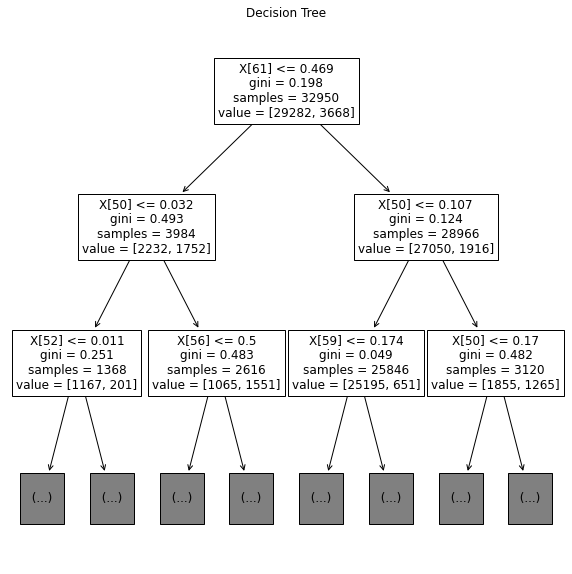

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<Figure size 1440x960 with 0 Axes>

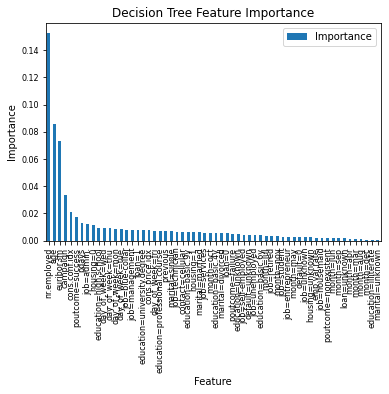

In [ ]:
# learn a decision tree using default parameters
cl = tree.DecisionTreeClassifier()
cl.fit(X_train, y_train)

# plot the tree
depth = 2
plt.figure(num=1, figsize=(depth*5, depth*5))
tree.plot_tree(cl, max_depth = depth, fontsize = 12)
plt.title('Decision Tree')
plt.show()

#statistics.variance(data)

# plot the feature importances
plt.figure(num=2, figsize=(12,8), dpi=120)
feature_importance = pd.DataFrame(cl.feature_importances_, index=X_train.columns, columns=['Importance']) # from 
feature_importance.drop(index=['duration'], inplace=True) # drop duration feature
nonzero_importance = feature_importance[feature_importance['Importance'] > 0]
nonzero_importance.sort_values('Importance',ascending=False, inplace=True)
nonzero_importance.plot(kind='bar', fontsize=8)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

### 2.2 Confusion Matrix and Accuracy

Compute the *confusion matrix* and *accuracy* of the tree using the held-out data set. Moreover, also compute the *recall*, *precision*, and *F1-score* of the tree. 


For this part, you can either implement your own functions or use the following scikit-learn libraries.  
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)


Reflect on the performance of the model and be aware of the difference between *accuracy* and *F1-score*. How good is this decision tree model for outlier detection?

In [ ]:
# use the model to make predictions for the test data set
y_pred = cl.predict(X_test)

# compute accuracy, recall, precision, and f1 score
ac = accuracy_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: " + str(ac) + "\nRecall: " + str(re) + "\nPrecision: " + str(pr) + "\nF1 score: " + str(f1))

Accuracy: 0.8858946346200534
Recall: 0.51440329218107
Precision: 0.5165289256198347
F1 score: 0.5154639175257731


_**QUESTION ANSWER FOR REPORT: The accuracy is very good (\~0.888) but the F1 score is low (\~0.531). The F1 score is based on the recall (\~0.546) and precision (\~0.517) scores, both of which are also low. This likely means that the number of True Positives is relatively low as well. We know of the data that many applicants get rejected and thus have class = 0, so the high accuracy score is most likely because of a high success rate in classifying True Negatives.**_

_**Because the tree classification algorithm has no maximum depth, it's likely that the model is overfitted.**_

### 2.3 Features to Tree  (optional)

Use the training data to re-fit a new decision tree with the parameter max_depth set to 4. Show the tree diagram and also plot the feature importances. 

Recalculate the performance of this simpler model. 

What do you observe?


Accuracy: 0.9087157076960427
Recall: 0.5380658436213992
Precision: 0.6331719128329297
F1 score: 0.5817575083426028


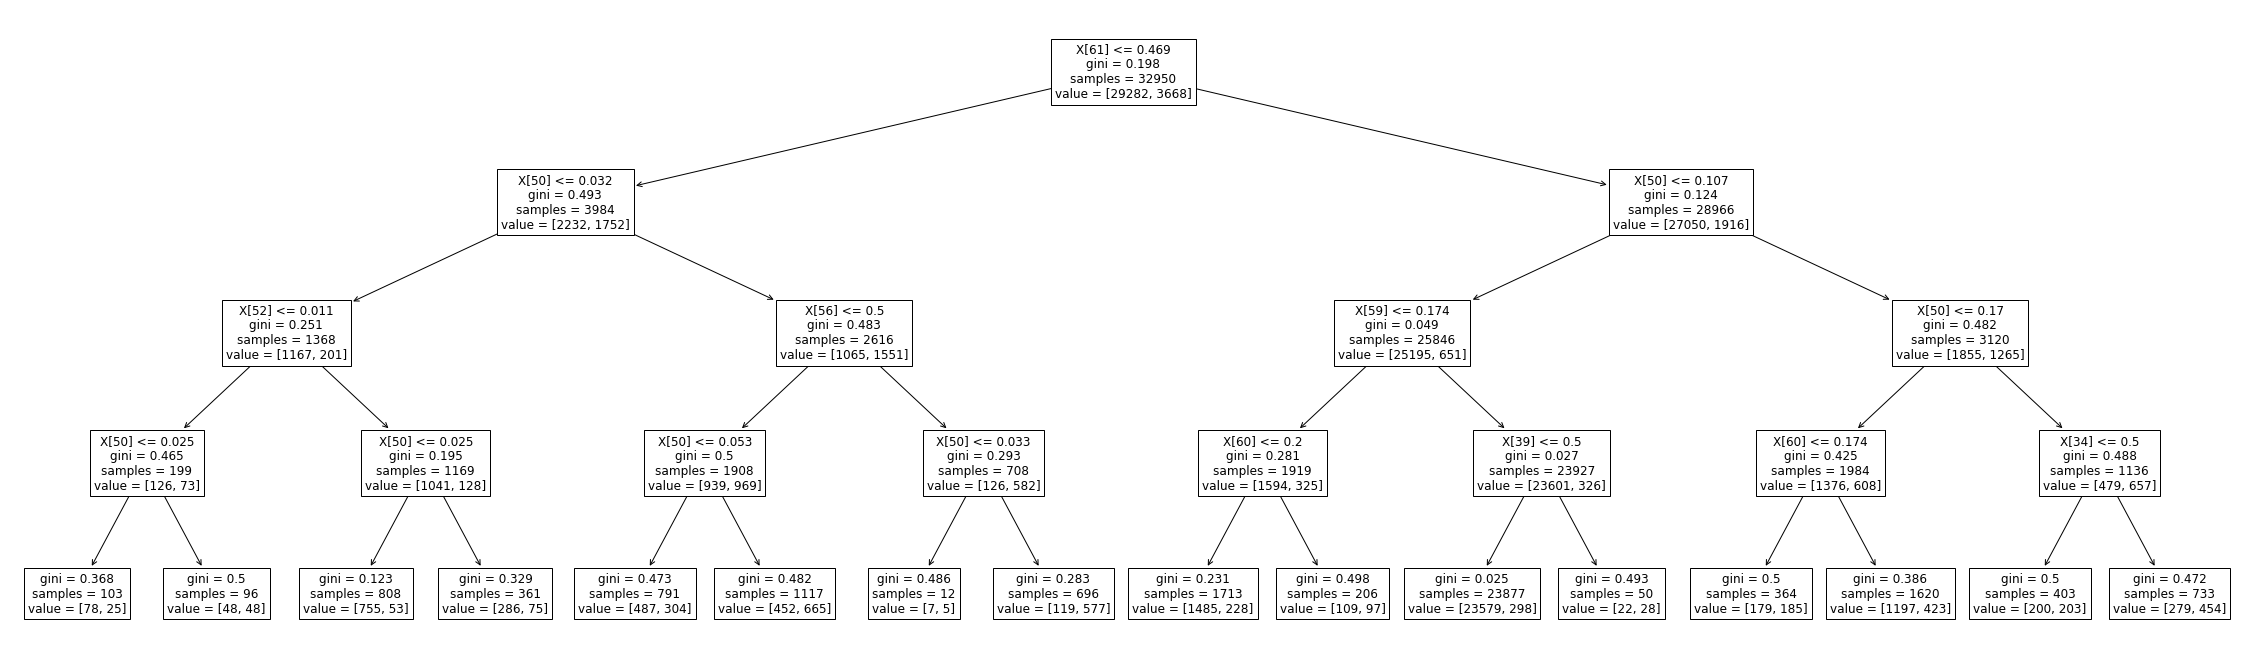

In [ ]:
# learn a decision tree with maximal depth 4
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)

# plot the tree
plt.figure(num=1, figsize=(40,12))
tree.plot_tree(clf, fontsize = 12)

# use the model to make predictions for the test data set
y_pred = clf.predict(X_test)

# compute accuracy, recall, precision, and f1 score
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: " + str(acc) + "\nRecall: " + str(rec) + "\nPrecision: " + str(pre) + "\nF1 score: " + str(f1))

_**QUESTION ANSWER FOR REPORT: The accuracy scores of the tree classification algorithm with max depth 4 and the three classification with no max depth are somewhat similar (\~0.888 with max\_depth = 4 vs \~0.910 with max\_depth = none). However, the precision score of the max depth algorithm is markedly higher (\~0.621) than that (\~0.517) of the default algorithm. The recall also slightly higher (\~0.569 vs \~0.546), leading to a notably higher f1 score (\~0.594 vs \~0.531).**_

_**As mentioned above, this is probably because model resulting from the algorithm with no limits on its max\_depth score is likely to be overfitted. This leads to a worse performance on the test data.**_

### 2.4 Cross validation (optional)

The code example shown here below uses the [kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) method to implement 10-fold cross-validation. Moreover, it uses the cross validation to explore how the max_depth influences the model performance. It keeps track of the validation accuracy scores and F1-scores across the 10 folds. 


Now, change the code to also compute the recall and precision. 


In [ ]:
# create 10-fold cross-validation
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Search the parameter among the following
C = np.arange(2, 10,)

# init acc
acc = np.zeros((nk , 8))
# init f1
f1 = np.zeros((nk , 8))
# init rec
rec = np.zeros((nk , 8))
# init pre
pre = np.zeros((nk , 8))
i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf = 1, max_depth = c)
        dt.fit(X_t, y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = accuracy_score(yhat , y_val)
        f1[i][j] = f1_score(yhat , y_val)
        rec[i][j] = recall_score(yhat, y_val)
        pre[i][j] = precision_score(yhat, y_val)
        j = j + 1
    i = i + 1
    
print('Mean accuracy: ' + str(np.mean(acc , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc , axis = 0))))

print('Mean F1: ' + str(np.mean(f1 , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(f1 , axis = 0))))

print('Mean recall: ' + str(np.mean(rec , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(rec , axis = 0))))

print('Mean precision: ' + str(np.mean(pre , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(pre , axis = 0))))

Mean accuracy: [0.90254932 0.9060091  0.91104704 0.91277693 0.91441578 0.91305008
 0.91283763 0.91286798]
Selected model index: 4
Mean F1: [0.48407528 0.58015559 0.5948767  0.57061973 0.58357751 0.58667082
 0.59436213 0.59283825]
Selected model index: 2
Mean recall: [0.60103777 0.58437595 0.61176675 0.64196004 0.64652837 0.6332446
 0.62543691 0.62669614]
Selected model index: 4
Mean precision: [0.40640719 0.57713375 0.58014567 0.51568822 0.53323943 0.54766034
 0.5671859  0.56294163]
Selected model index: 2


### 2.5 Tree Tuning



The built-in decision tree algorithm you are using has several parameters which you can tune (e.g., *max_depth* and *min_samples_leaf*). Use 10-fold cross-validation (e.g., reuse the code of task 2.4 and adapt the code for two parameters), show how the choice of these parameters affects performance. 


#### Tips: 
Make a decision on the range of values that you would try for the two parameters and discuss your choice in the experiment setup section.

Here is a guide that helps you to build the experiment.
First, reuse the code of task 2.4 and show how max_depth affects train and test accuracy. On a single axis, plot train and test accuracy as a function of max_depth. Use a red line to show test accuracy and a blue line to show train accuracy. (Do not use your held-out test data yet). 

Second, show how test accuracy relates to both max_depth and min_samples_leaf. Specifically, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest F1 score? How sensitive are the results to these two parameters? 

Finally, select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data -- how does it compare to the cross-validated F1 score?


In [ ]:
# create 10-fold cross-validation
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# variable settings
dp   = 2   # max_depth         step 1
lf   = 2   # min_samples_leaf  step 1
dp_s = 1   # max_depth         step size
lf_s = 1   # min_samples_leaf  step size
st_n = 16  # number of steps

# set the search space of the parameters
C = np.arange(dp, dp + (dp_s * st_n), dp_s) # max_depth counter
D = np.arange(lf, lf + (lf_s * st_n), lf_s) # min_samples_leaf counter

# learn an optimal decision tree model
acc = np.zeros(((nk , st_n , st_n))) # accuracy
f1  = np.zeros(((nk , st_n , st_n))) # f1 score
rec = np.zeros(((nk , st_n , st_n))) # recall
pre = np.zeros(((nk , st_n , st_n))) # precision
i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for c in C:
        k = 0
        for d in D:
            dt = tree.DecisionTreeClassifier(min_samples_leaf = d, max_depth = c)
            dt.fit(X_t, y_t)
            yhat = dt.predict(X_val)
            acc[i][j][k] = accuracy_score(yhat , y_val)
            f1[i][j][k]  = f1_score(yhat , y_val)
            rec[i][j][k] = recall_score(yhat , y_val)
            pre[i][j][k] = precision_score(yhat , y_val)
            k = k + 1
        j = j + 1
    i = i + 1

In [ ]:
mean_acc = np.mean(acc , axis = 0)
print('Mean accuracy: \n' + str(mean_acc))
acc_index_x = mt.floor(np.argmax(mean_acc) / st_n)
acc_index_y = np.argmax(mean_acc) % st_n
print('Selected model index: (' + str(acc_index_x) + ',' + str(acc_index_y) + ')')
print('Optimal vars for accuracy: ' + 'max_depth = ' + str(C[acc_index_x]) + ', min_samples_leaf = ' + str(D[acc_index_y]))
print('Optimal accuracy score: ' + str(np.max(mean_acc)) + '\n')

mean_f1 = np.mean(f1 , axis = 0)
print('Mean f1 score: \n' + str(mean_f1))
f1_index_x = mt.floor(np.argmax(mean_f1) / st_n)
f1_index_y = np.argmax(mean_f1) % st_n
print('Selected model index: (' + str(f1_index_x) + ',' + str(f1_index_y) + ')')
print('Optimal vars for f1: ' + 'max_depth = ' + str(C[f1_index_x]) + ', min_samples_leaf = ' + str(D[f1_index_y]))
print('Optimal accuracy score: ' + str(np.max(mean_f1)) + '\n')

mean_rec = np.mean(rec , axis = 0)
print('Mean recall: \n' + str(mean_rec))
rec_index_x = mt.floor(np.argmax(mean_rec) / st_n)
rec_index_y = np.argmax(mean_rec) % st_n
print('Selected model index: (' + str(rec_index_x) + ',' + str(rec_index_y) + ')')
print('Optimal vars for recall: ' + 'max_depth = ' + str(C[rec_index_x]) + ', min_samples_leaf = ' + str(D[rec_index_y]))
print('Optimal accuracy score: ' + str(np.max(mean_rec)) + '\n')

mean_pre = np.mean(pre , axis = 0)
print('Mean precision: \n' + str(mean_pre))
pre_index_x = mt.floor(np.argmax(mean_pre) / st_n)
pre_index_y = np.argmax(mean_pre) % st_n
print('Selected model index: (' + str(pre_index_x) + ',' + str(pre_index_y) + ')')
print('Optimal vars for precision: ' + 'max_depth = ' + str(C[pre_index_x]) + ', min_samples_leaf = ' + str(D[pre_index_y]))
print('Optimal accuracy score: ' + str(np.max(mean_pre)))

Mean accuracy: 
[[0.90358118 0.90358118 0.90358118 0.90358118 0.90358118 0.90358118
  0.90358118 0.90358118 0.90358118 0.90358118 0.90358118 0.90358118
  0.90358118 0.90358118 0.90358118 0.90358118]
 [0.90883156 0.90883156 0.90883156 0.90883156 0.90883156 0.90883156
  0.90883156 0.90883156 0.90883156 0.90883156 0.90883156 0.90883156
  0.90883156 0.90883156 0.90883156 0.90883156]
 [0.91277693 0.91277693 0.91277693 0.91277693 0.91277693 0.91277693
  0.91280728 0.91280728 0.91277693 0.91277693 0.91274659 0.91274659
  0.91274659 0.91280728 0.91280728 0.91280728]
 [0.91532625 0.91532625 0.91532625 0.9152959  0.9152959  0.91538695
  0.9154173  0.91538695 0.91526555 0.91520486 0.91517451 0.91517451
  0.91514416 0.91520486 0.9154173  0.9154173 ]
 [0.91532625 0.9152959  0.91538695 0.915478   0.915478   0.91562974
  0.91544765 0.91538695 0.9153566  0.9152352  0.91520486 0.91526555
  0.91502276 0.91514416 0.9154173  0.91553869]
 [0.9138695  0.9138695  0.91362671 0.9137481  0.91411229 0.91441578
 

In [ ]:
# apply the optimal decision tree model
dt = tree.DecisionTreeClassifier(min_samples_leaf = 14, max_depth = 4)
dt.fit(X_test, y_test)
yhat = dt.predict(X_val)
acc = accuracy_score(yhat , y_val)
f1  = f1_score(yhat , y_val)
rec = recall_score(yhat , y_val)
pre = precision_score(yhat , y_val)

In [ ]:
print('Accuracy: ' + str(acc))

print('f1 score: ' + str(f1))

print('Recall: ' + str(rec))

print('Precision: ' + str(pre))

Accuracy: 0.9222357229647631
f1 score: 0.6444444444444445
Recall: 0.7160493827160493
Precision: 0.5858585858585859


Best = 4 & 14

In [ ]:
import plotly.express as px

depth_arr = []
minsamples_arr = []
pre_scores = []

for x in range(len(C)):
    for v in C:
        depth_arr.append(v)
    
for x in D:
    minsamples_arr+=([x] * len(D))

for y in mean_pre:
    for x in y:
        pre_scores.append(x)

fig = px.scatter_3d(x=depth_arr, y=minsamples_arr, z=pre_scores, color=pre_scores)
fig.update_layout(scene = dict(
                    xaxis_title='max_depth',
                    yaxis_title='min_samples_leaf',
                    zaxis_title='f1 score'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

## Task 3. Random Forest

Now use a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the labels for the data set. 

i) use the default values for the parameters to get a RF model running. 

ii) use 10-fold cross-validation to determine a possibly better choice for the parameter *n_estimators* and *max_features*
    
iii) select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data ?

In the report, reflect on how does the test performance of RF compare to the decision tree performance? 
 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rf_default = RandomForestClassifier()
print("Default values:\n\n", cross_validate(rf_default, X_train, np.ravel(y_train), cv=10))

# Should make a for-loop that iterates over the values n_estimators and max_features

# TODO: set the search space of the parameters

# TODO: learn an optimal random forest model

# TODO: compute the performance of the model on your held-out test data

ValueError: ignored

## Task 4. Outlier Detection (Unsupervised)

### 4.1 Outlier Detection - Isolation Forest

Use the [Isolation Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to detect potential outliers in the data set. 

Again, select two parameters that you would like to investigate and fine-tune (for example, contamination, max_depth, n_estimators, max_samples). For each configuration: 

i) Apply Isolation Forest on the entire data set (without using the labels)


ii) Compute the accuracy, recall, precision, and F1-score on the entire data set (using the labels). 


Compare the performance of Isolation Forest using different configurations. 


#### Tips:

- Note that the fit(X) function of the Isolation Forest does not use the labels. 


- **Look carefully at the values that an Isolation Forest classifier returns. Which value represents the outlier class? Be aware that you need to implement a mapping function f(x) that remaps -1 to 1 and 1 to 0, in order to transform the predictions such that the semantics are consistant with the previous classification algorithms.**


- Create 2D or 3D plots to visualize your results



In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import IsolationForest

# TODO: set the search space of the parameters

contamination_rates = np.arange(0.05, 0.51, 0.1)
n_estimators = np.arange(1, 200, 40)
# Create function that remaps isolation forest output
new_output = {-1 : 1, 1 : 0}
def remap(if_output):
    return np.vectorize(new_output.get)(if_output)


# TODO: apply the configured Isolation Forest model on the full data set. 
# Apply 5-fold cross validation
nk = 5
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

len_cr = len(contamination_rates)
len_estimators = len(n_estimators)
# initialize scores
acc = np.zeros(((nk , len_cr , len_estimators))) # accuracy
f1 = np.zeros(((nk , len_cr , len_estimators)))  # f1 score
rec = np.zeros(((nk , len_cr , len_estimators))) # recall
pre = np.zeros(((nk , len_cr , len_estimators))) # precision

i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for rate in contamination_rates:
        k = 0
        for n in n_estimators:
            if_clf = IsolationForest(n_estimators=n, contamination=rate)
            if_clf.fit(X_t) # perform fit on unlabeled dataset
            # TODO: compute the performance of the model
            classified = if_clf.predict(X_val) # Predict outliers
            yhat = remap(classified) # remap to 0 = non-outlier and 1 = outlier
            acc[i][j][k] = accuracy_score(yhat , y_val)
            f1[i][j][k] = f1_score(yhat , y_val)
            rec[i][j][k] = recall_score(yhat , y_val)
            pre[i][j][k] = precision_score(yhat , y_val)
            k = k + 1
        j = j + 1
    i = i + 1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
mean_acc = np.mean(np.mean(np.mean(acc)))
mean_f1 = np.mean(np.mean(np.mean(f1)))
mean_rec = np.mean(np.mean(np.mean(rec)))
mean_pre = np.mean(np.mean(np.mean(pre)))

print("The mean accuracy score for CV Isolation Forest was: %f" % mean_acc)
print("The mean F1 score for CV Isolation Forest was: %f" % mean_f1)
print("The mean recall score for CV Isolation Forest was: %f" % mean_rec)
print("The mean precision score for CV Isolation Forest was: %f" % mean_pre)

In [ ]:
# TODO: 3d plot for Isolation Forest
import plotly.express as px
folds = np.arange(nk)
folds_arr = []
contamination_arr = []
estimators_arr = []

for i in folds:
    for j in contamination_rates:
        for k in n_estimators:
            estimators_arr.append(k)
            contamination_arr.append(j)
            folds_arr.append(i)
            

# Plots for different score types
def plot_IFparameters(score_type):
    scores = score_type.flatten()
    fig = px.scatter_3d(x=folds_arr, y=contamination_arr, z=estimators_arr, color=scores)
    fig.update_layout(scene = dict(
                        xaxis_title='Kth Fold',
                        yaxis_title='Contamination Rate',
                        zaxis_title='Number of Estimators'),
                        title='Isolation Forest Parameters',
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10))

    fig.show()

plot_IFparameters(pre)


### 4.2 Outlier Detection - Analyze Outliers

Taking the best performing Isolation Forest model from Task 4.1, enrich the data set with the outlier labels (or scores) assigned by the model. 

Perform one or two analyses to show the characteristics of the outliers. 

In [ ]:
# Run isolation forest on best parameters
if_clf = IsolationForest(n_estimators=41, contamination=0.15)
if_clf.fit(X_train)
classified = if_clf.predict(X_test)
yhat = remap(classified)

acc_test = accuracy_score(yhat, y_test)
f1_test = f1_score(yhat, y_test)
rec_test = recall_score(yhat, y_test)
pre_test = precision_score(yhat, y_test)

mean_acc = np.mean(acc_test)
mean_f1 = np.mean(f1_test)
mean_rec = np.mean(rec_test)
mean_pre = np.mean(pre_test)

print("The mean accuracy score for Test Isolation Forest was: %f" % mean_acc)
print("The mean F1 score for Test Isolation Forest was: %f" % mean_f1)
print("The mean recall score for Test Isolation Forest was: %f" % mean_rec)
print("The mean precision score for Test Isolation Forest was: %f" % mean_pre)

In [ ]:
# TODO: enrich the data with the anomaly scores assigned by the optimal model. 
# Predict from entire dataset
classified = if_clf.predict(X)
predicted = remap(classified)

# New dataframe with actual and predicted class labels of test data
test_data = data.copy()
test_data['predicted class'] = predicted

print("The number of predicted outliers is %d" % sum(test_data['predicted class']))
print("The number of entries with class label 1 is %d" % sum(test_data['class']))

In [ ]:
# TODO: Perform one or two analyses to show the characteristics of the outliers. 
# Class labels
px.scatter(test_data, x='duration', y='age', color='class', title='Actual class labels among age and duration')

In [ ]:
# Outliers
px.scatter(test_data, x='duration', y='age', color='predicted class', title='Outliers among age and duration')

## Task 5. Report your results and discuss your findings

By now, you have applied three algorithms with different parameters on the data set. For each algorithm, you have create tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that show the optimal performance of each algorithm on the data set, for example see the table here below. 

Discuss your findings in the report and reflect on the following questions:
- According to the performance results, which one is the optimal model? 
- How large is the difference between the accuracy score and the F1 score for each model? What caused the difference?
- Which of performance measures (the accuracy score, recall, preceision, or F1-score) would you use for comparing the model performance? Why?
- You are comparing the performance of supervised algorithms (DT and RF) with an unsupervised algorithm (Isolation Forest). Is this a fair comparison? Motivate your answer. 





| Model | CV Accuracy  | Test Accuracy |  CV Recall  |  Test Recall  | CV F1 | Test F1 | CV Precision | Test Precision |
|------|------|------|------|------|------|------|-----|-----|
|   Decision Tree        | 0.911 |  | 0.611 | | 0.595 | | 0.581 |
|   Random Forest  |  |  | || | | |
|   Isolation Forest        | 0.744 | 0.826 | 0.251 | 0.327 | 0.278 | 0.371 | 0.444 | 0.428


## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement another outlier detection algorithm (for example, LOF, OC-SVM) or design your own outlier detection algorithm that achieves a better F1 score. 


2. Implement techniques (e.g., preprocessing, feature engineering, sampling) that help improve the F1 scores of existing models


In [ ]:
!python --version

Python 3.7.15
